## MobileNetV2

In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.applications.mobilenet_v2 import decode_predictions


In [2]:
import os
os.chdir("c:\\Users\\riandrea\\Desktop\\Github\\SceneDetect")
os.getcwd()


'c:\\Users\\riandrea\\Desktop\\Github\\SceneDetect'

In [3]:
MobileNetV2 = MobileNetV2(weights='imagenet')
MobileNetV2.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [6]:
mobilenetV2_shorted = MobileNetV2.layers[-2].output
MobileNetV2.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

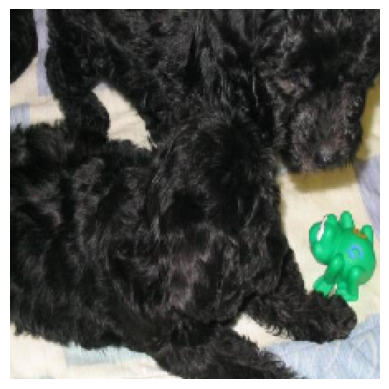

In [4]:
# Bild laden
image_path = r"cats_and_dogs_small\test\dogs\1509.jpg"

# Bild auf die gewünschte Eingabegröße skalieren unsere Modell nimmt 180 x 180 x3
img = image.load_img(image_path, target_size=(224, 224))

# Bild anzeigen
plt.imshow(img)
plt.axis("off")
plt.show()


In [11]:
img = imageio.imread(image_path)

# Bild auf die gewünschte Größe (224, 224) skalieren
img_resized = Image.fromarray(img).resize((224, 224))
print(img_resized)

# Bild in das numpy Array einfügen
data = np.empty((1, 224, 224, 3))
data[0] = np.array(img_resized)

print(data)


<PIL.Image.Image image mode=RGB size=224x224 at 0x1C2961E6250>
[[[[  4.   6.   5.]
   [  7.   9.   8.]
   [  8.  10.   9.]
   ...
   [ 55.  55.  53.]
   [ 57.  57.  55.]
   [ 60.  60.  58.]]

  [[  7.   9.   8.]
   [  6.   8.   7.]
   [  7.   9.   8.]
   ...
   [ 51.  51.  49.]
   [ 50.  50.  48.]
   [ 56.  56.  54.]]

  [[  7.   9.   8.]
   [ 10.  12.  11.]
   [ 10.  12.  11.]
   ...
   [ 45.  45.  43.]
   [ 62.  62.  60.]
   [ 61.  61.  59.]]

  ...

  [[239. 238. 220.]
   [239. 237. 223.]
   [239. 237. 226.]
   ...
   [193. 210. 226.]
   [199. 212. 229.]
   [204. 216. 231.]]

  [[240. 238. 223.]
   [240. 238. 225.]
   [236. 233. 222.]
   ...
   [197. 214. 229.]
   [205. 217. 231.]
   [205. 213. 227.]]

  [[240. 238. 223.]
   [237. 236. 223.]
   [229. 227. 217.]
   ...
   [199. 215. 231.]
   [208. 217. 230.]
   [203. 210. 220.]]]]


In [14]:
# Werte zwischen -1 und +1
data = preprocess_input(data)


In [17]:
predictions = MobileNetV2.predict(data)
print(predictions.shape)
print('Shape: {}'.format(predictions.shape))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
(1, 1000)
Shape: (1, 1000)


In [18]:
output_neuron = np.argmax(predictions[0])
print('Most active neuron: {} ({:.2f}%)'.format(
    output_neuron,
    100 * predictions[0][output_neuron]
))


Most active neuron: 818 (31.66%)


In [19]:
for name, desc, score in decode_predictions(predictions)[0]:
    print('- {} ({:.2f}%)'.format(desc, 100 * score))

- spotlight (31.66%)
- digital_clock (3.32%)
- matchstick (3.20%)
- theater_curtain (2.84%)
- lampshade (2.10%)


---
## Fine tune MobileNetV2

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow import keras

In [23]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [26]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [24]:
base_model.trainable = False


In [30]:
# Build the new model
MobileNetV2_finetuned = models.Sequential([
    base_model,  # Include the MobileNetV2 as the base
    layers.GlobalAveragePooling2D(),  # Apply Global Average Pooling
    layers.Dense(1024, activation='relu'),  # Fully connected layer
    layers.ReLU(max_value=10, negative_slope=0.5, threshold=0),  # Custom ReLU activation
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [31]:
MobileNetV2_finetuned.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,570,753 (13.62 MB)

 Trainable params: 1,312,769 (5.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [32]:
MobileNetV2_finetuned.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [33]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,  
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [34]:
train_dir = r'user_pictures\100_pic_train'            # Dein Trainingsdaten-Verzeichnis
validation_dir = r'user_pictures/100_pic_valid'  # Dein Validierungsdaten-Verzeichnis

#Achtung die Klassen werden aus dem Verzeichnis erstellt wir haben in dem Ornder "100_pic" zwei Weitere Ordner namens Cat und Dogs 
# woraus sich die Klassen herausstellen haben wir weitere Ordner wie Pferd und Wolf haben wir 4 Klassen
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 202 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [36]:
import json
import os

# Überprüfen, ob das Modell bereits existiert umso Ressourcen zupassen falls ein Modell bereits hinterlegt wurde
path_to_model = r"model/fine_tuned_model.keras"

if os.path.isfile(path_to_model):
    history = load_model(path_to_model)
    print("exist")

else:       
    # Falls kein Modell da ist wird das Modell trainiert und nur das Beste modell gespeichert.
    # Trainiere das Modell
    history = MobileNetV2_finetuned.fit(
        train_generator,
        epochs=8,
        validation_data=validation_generator,
        callbacks=[  
            keras.callbacks.ModelCheckpoint('model/fine_tuned_model.keras', 
                                            save_best_only=True, 
                                            monitor='val_loss')
        ]
    )
    
    # Die Parameter in History werden zwischen gespeichert in einer JSON da sonst später die History nicht ausgeben werden kann.

    history_dict = history.history  # Das History-Objekt enthält alle Metriken
    with open('train_history.json', 'w') as json_file:
        json.dump(history_dict, json_file, indent=4)


c:\Users\riandrea\Desktop\Github\SceneDetect\project\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.5703 - loss: 1.1931

c:\Users\riandrea\Desktop\Github\SceneDetect\project\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5900 - loss: 1.1610 - val_accuracy: 0.9653 - val_loss: 0.0968
Epoch 2/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 998ms/step - accuracy: 0.9624 - loss: 0.0998 - val_accuracy: 0.9703 - val_loss: 0.0733
Epoch 3/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9294 - loss: 0.1907 - val_accuracy: 0.9851 - val_loss: 0.0477
Epoch 4/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 992ms/step - accuracy: 0.9703 - loss: 0.0730 - val_accuracy: 0.9901 - val_loss: 0.0285
Epoch 5/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 921ms/step - accuracy: 0.9454 - loss: 0.0855 - val_accuracy: 0.9851 - val_loss: 0.0431
Epoch 6/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9946 - loss: 0.0284 - val_accuracy: 0.9950 - val_loss: 0.0184
Epoch 7/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 957ms/step - accuracy: 0.9783 - loss: 0.0597 - val_accuracy: 0.9901 - val_loss: 0.0427
Epoch 8/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 922ms/step - accuracy: 0.9775 - loss: 0.0414 - val_accuracy: 0.9901 - val_loss: 0.0300


In [37]:
# Evaluierung des Modells auf den Validierungsdaten
eval_results = MobileNetV2_finetuned.evaluate(validation_generator)
print(f"Loss: {eval_results[0]}")
print(f"Accuracy: {eval_results[1]}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step - accuracy: 0.9927 - loss: 0.0230
Loss: 0.029956001788377762
Accuracy: 0.9900990128517151


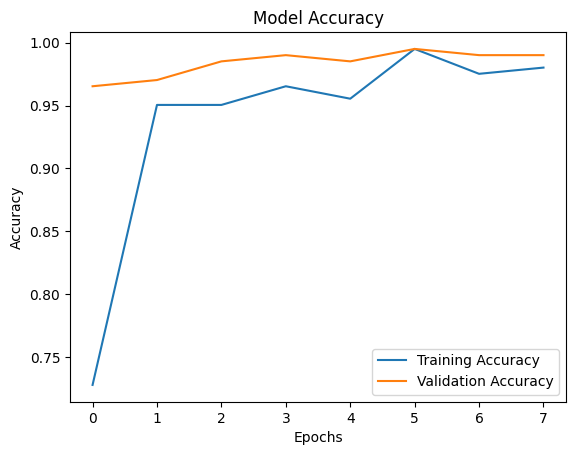

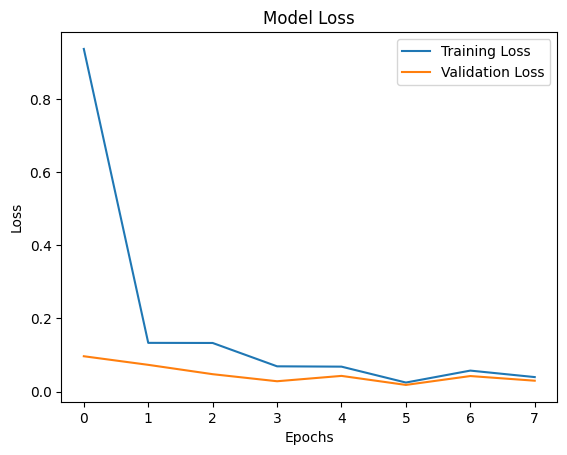

In [38]:
import json
import matplotlib.pyplot as plt

# Laden der JSON-Datei mit den Trainingsdaten
with open('train_history.json', 'r') as json_file:
    history_dict = json.load(json_file)

# Beispiel für das Plotten der Trainings- und Validierungsgenauigkeit
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Beispiel für das Plotten des Trainings- und Validierungsverlusts
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Predictions 

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1. Lade das Bild, das du testen möchtest
img_path = r'cats_and_dogs_small\test\DOGS\1527.jpg'  # Pfad zum Bild, das du testen möchtest

# Lade das Bild und skaliere es auf die Eingabegröße des Modells
img = image.load_img(img_path, target_size=(224, 224))

# 2. Konvertiere das Bild in ein Array und normalisiere es
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Füge eine Batch-Dimension hinzu
img_array /= 255.0  # Normalisiere das Bild (falls beim Training auch normalisiert wurde)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Das Bild zeigt die Hund Klasse.


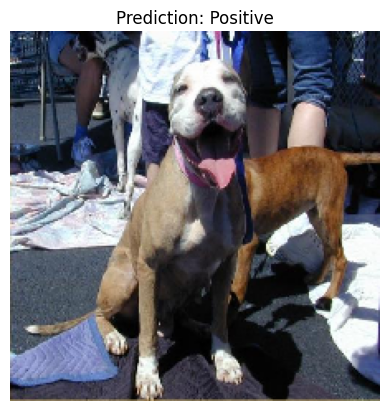

[[0.9999979]]


In [42]:

# 3. Vorhersage des Modells
predictions = MobileNetV2_finetuned.predict(img_array)

# 4. Interpretiere die Vorhersage
# Hier nehmen wir an, dass es sich um ein binäres Klassifikationsproblem handelt
# (z.B. Hund vs. Katze)

# Bei binärer Klassifikation gibt das Modell eine Wahrscheinlichkeit zurück
# Wenn die Wahrscheinlichkeit größer als 0.5 ist, dann gehört das Bild zur positiven Klasse
if predictions[0] > 0.5:
    print("Das Bild zeigt die Hund Klasse.")
else:
    print("Das Bild zeigt die Katzen Klasse.")

# 5. (Optional) Visualisiere das Bild
plt.imshow(img)
plt.title(f'Prediction: {"Positive" if predictions[0] > 0.5 else "Negative"}')
plt.axis('off')  # Verstecke die Achsen
#plt.text(x=0,y=0,s=str(predictions))
plt.show()
print(predictions)

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Anzahl der Klassen
num_classes = 5  # Beispiel: Ändere dies zu der Anzahl der Klassen in deinem Problem

# Base model ohne die oberste Schicht laden
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Base model nicht trainierbar machen
base_model.trainable = False

# Neues Modell erstellen
MobileNetV2_finetuned = models.Sequential([
    base_model,  # MobileNetV2 als Basis
    layers.GlobalAveragePooling2D(),  # Global Average Pooling
    layers.Dense(1024, activation='relu'),  # Fully connected Layer
    layers.Dense(num_classes, activation='softmax')  # Ausgabeschicht für Mehrklassen-Klassifikation
])
# Kompiliere das Modell mit der passenden Loss-Funktion für Mehrklassen-Klassifikation
MobileNetV2_finetuned.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator für das Training und die Validierung erstellen
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalisierung der Pixelwerte
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = r'user_pictures\100_pic_train'  # Trainingsdaten-Verzeichnis
validation_dir = r'user_pictures/100_pic_valid'  # Validierungsdaten-Verzeichnis

# Training-Daten-Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')  # Für Mehrklassen-Klassifikation

# Validierungs-Daten-Generator
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')  # Für Mehrklassen-Klassifikation


In [ ]:
MobileNetV2_finetuned.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Pfad zum Bild
image_path = r'user_pictures\100_pic_test\cats\1567.jpg'

# Bild laden und vorverarbeiten
img = image.load_img(image_path, target_size=(224, 224))  # Größe muss zu deinem Modell passen
img_array = image.img_to_array(img)  # Bild in ein Array umwandeln
img_array = np.expand_dims(img_array, axis=0)  # Batch-Dimension hinzufügen
img_array = preprocess_input(img_array)  # Vorverarbeitung für MobileNetV2

# Vorhersage mit dem Modell
prediction = MobileNetV2_finetuned.predict(img_array)

# Vorhersage auswerten
predicted_class = np.argmax(prediction)  # Index der höchsten Wahrscheinlichkeit

# Laden der ImageNet-Klassen aus der Datei
with open('imagenet_classes.txt', 'r') as file:
    imagenet_classes = [line.strip() for line in file.readlines()]

# Überprüfen, ob der Index gültig ist
if predicted_class < len(imagenet_classes):
    predicted_label = imagenet_classes[predicted_class]
    print(f'Die vorhergesagte Klasse ist: {predicted_label} mit einer Wahrscheinlichkeit von {prediction[0][predicted_class]:.2f}')
else:
    print("Vorhergesagter Index liegt außerhalb des gültigen Bereichs der Klassenlabels.")


In [ ]:
import tensorflow_datasets as tfds
builder = tfds.folder_dataset.ImageFolder(r'cats_and_dogs_small')
print(builder.info)


In [ ]:
raw_test = builder.as_dataset(split='test', shuffle_files=True)
raw_train = builder.as_dataset(split='train', shuffle_files=True)
raw_valid = builder.as_dataset(split='validation', shuffle_files=True)

In [ ]:
IMG_SHAPE = (224, 224, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.trainable = False


In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2)

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator für das Training und die Validierung erstellen
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalisierung der Pixelwerte
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = r'user_pictures\100_pic_train'  # Trainingsdaten-Verzeichnis
validation_dir = r'user_pictures/100_pic_valid'  # Validierungsdaten-Verzeichnis

# Training-Daten-Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')  # Für Mehrklassen-Klassifikation

# Validierungs-Daten-Generator
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')  # Für Mehrklassen-Klassifikation


In [ ]:
validation_steps=20
initial_epochs = 20

loss0,accuracy0 = model.evaluate(validation_generator, steps = validation_steps)

In [ ]:
history = model.fit(train_generator,
                    epochs=initial_epochs,
                    validation_data=validation_generator)


history_dict = history.history  # Das History-Objekt enthält alle Metriken
with open('Fine_train_history.json', 'w') as json_file:
        json.dump(history_dict, json_file, indent=4)

In [ ]:
import json
import matplotlib.pyplot as plt

# Laden der JSON-Datei mit den Trainingsdaten
with open('Fine_train_history.json', 'r') as json_file:
    history_dict = json.load(json_file)

# Beispiel für das Plotten der Trainings- und Validierungsgenauigkeit
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Beispiel für das Plotten des Trainings- und Validierungsverlusts
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_generator,
                         epochs=total_epochs,
                         initial_epoch =  history.epoch[-1],
                         validation_data=validation_generator)

In [ ]:
# Beispiel für das Plotten der Trainings- und Validierungsgenauigkeit
plt.plot(history_fine['accuracy'], label='Training Accuracy')
plt.plot(history_fine['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Beispiel für das Plotten des Trainings- und Validierungsverlusts
plt.plot(history_fine['loss'], label='Training Loss')
plt.plot(history_fine['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Bild laden
image_path = r"cats_and_dogs_small\test\dogs\1509.jpg"

# Bild auf die gewünschte Eingabegröße skalieren unsere Modell nimmt 180 x 180 x3
img = image.load_img(image_path, target_size=(224, 224))

# Bild anzeigen
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
img = imageio.imread(image_path)

# Bild auf die gewünschte Größe (224, 224) skalieren
img_resized = Image.fromarray(img).resize((224, 224))

# Bild in das numpy Array einfügen
data = np.empty((1, 224, 224, 3))
data[0] = np.array(img_resized)

In [ ]:
data = preprocess_input(data)
data.shape

In [ ]:
predictions = history.predict(data)
print('Shape: {}'.format(predictions.shape))